In [1]:
import scanpy as sc

In [2]:
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# step1 pca

In [3]:
#preform pca
sc.tl.pca(adata, n_comps=None, zero_center=True, svd_solver='arpack', random_state=0, return_info=False, use_highly_variable=None, dtype='float32', copy=False, chunked=False, chunk_size=None)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


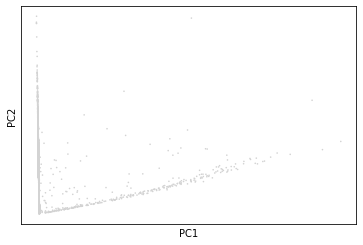

In [4]:
sc.pl.pca(adata)

In [5]:
 sc.pp.recipe_zheng17(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [6]:
sc.tl.pca(adata, n_comps=None, zero_center=True, svd_solver='arpack', random_state=0, return_info=False, use_highly_variable=None, dtype='float32', copy=False, chunked=False, chunk_size=None)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


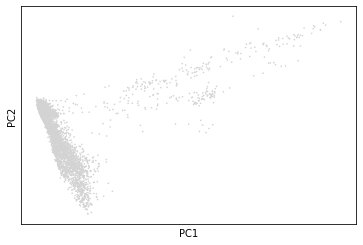

In [7]:
sc.pl.pca(adata)

In [8]:
sc.pp.neighbors(adata)

# step 2 clustering

In [9]:
#get leiden
sc.tl.leiden(adata)

In [10]:
#tsne analysis
sc.tl.tsne(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


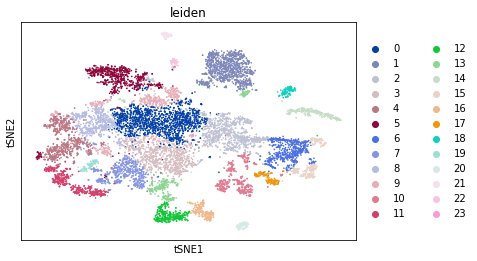

In [11]:
sc.pl.tsne(adata, color='leiden')

In [12]:
#umap analysis
sc.tl.umap(adata)

# Step 3 

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


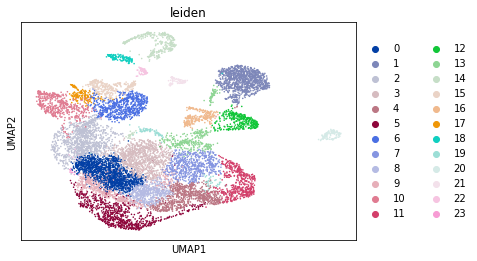

In [13]:
sc.pl.umap(adata, color='leiden')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


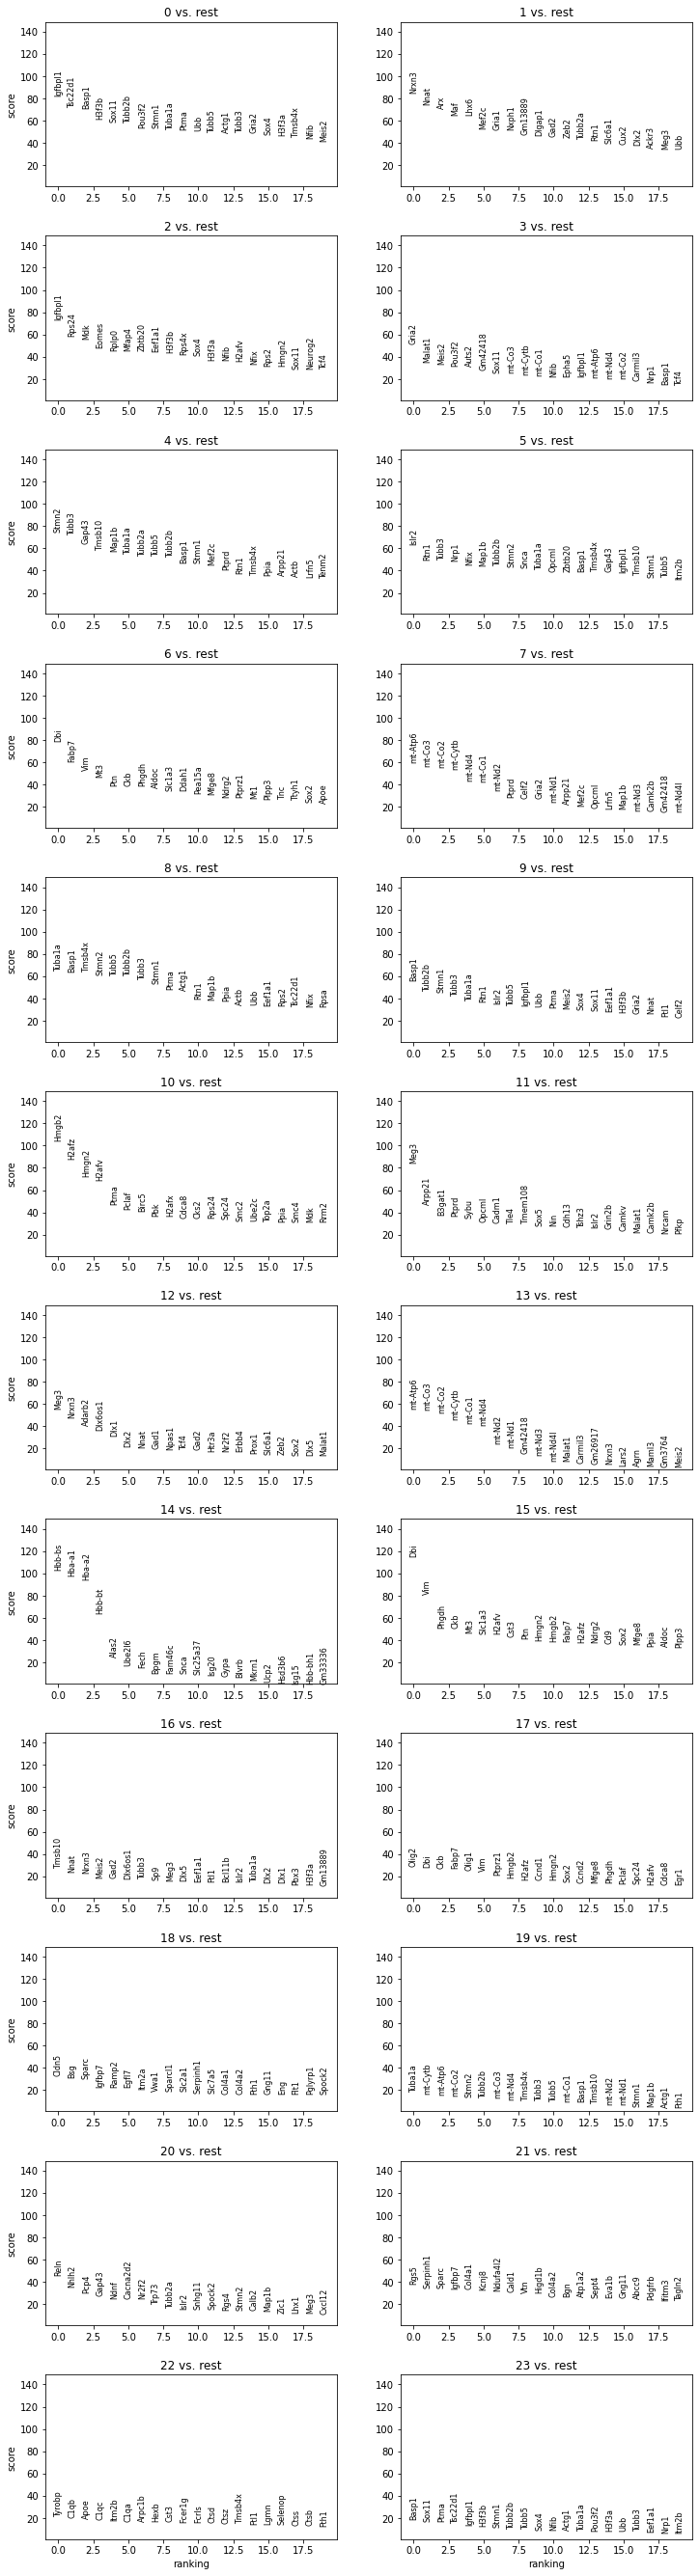

In [15]:
# rank groups by leiden
sc.tl.rank_genes_groups(adata, groupby = 'leiden')
sc.pl.rank_genes_groups(adata, ncols = 2)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


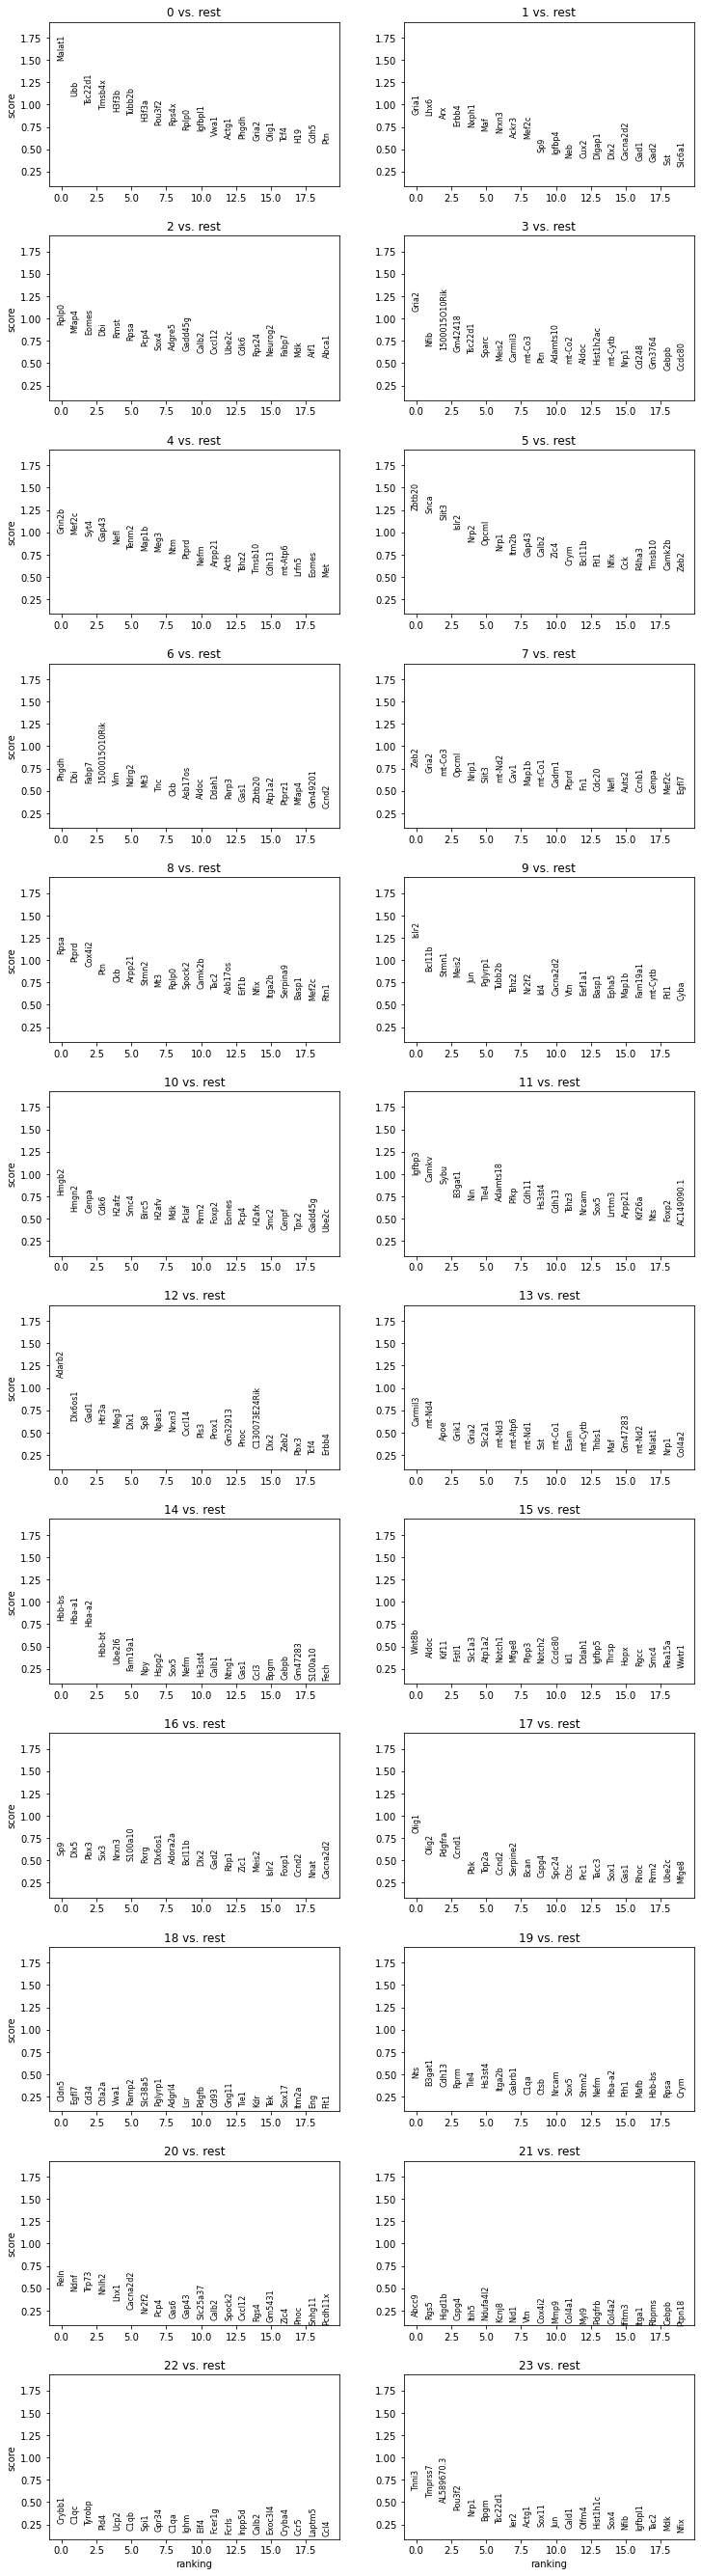

In [16]:
#use logreg method
sc.tl.rank_genes_groups(adata, groupby = 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, ncols = 2)

# Step 4: Identification

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


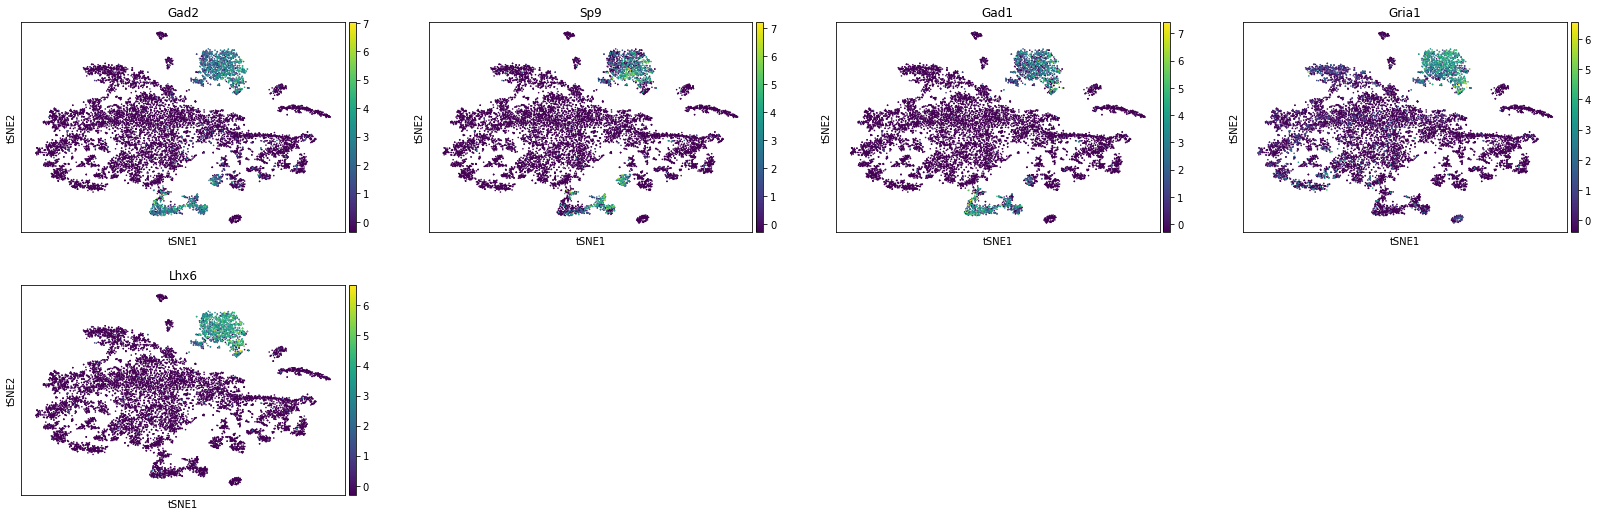

In [17]:
#gaba producing neurons (interneurons) = 1 & 12 vs. rest

sc.pl.tsne(adata, color=['Gad2', 'Sp9', 'Gad1', 'Gria1', 'Lhx6'])

#all seem to be involved 

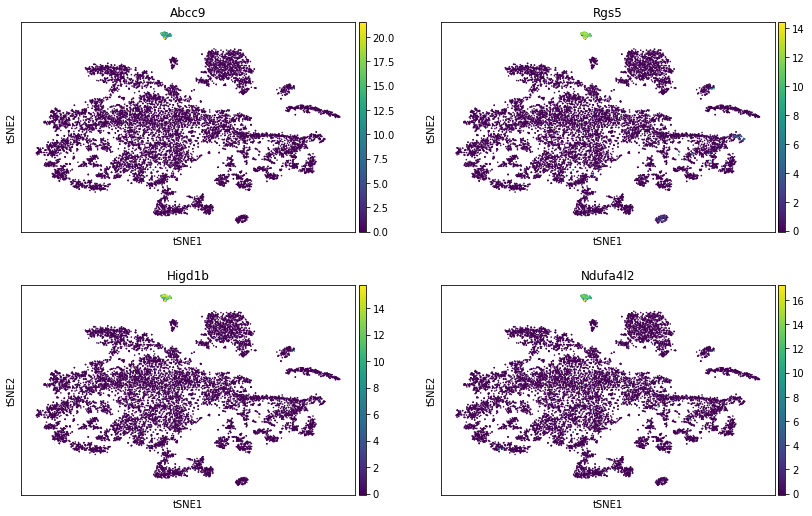

In [18]:
#pericytes and vascular related cells = 21 vs. rest
sc.pl.tsne(adata, color=['Abcc9', 'Rgs5', 'Higd1b','Ndufa4l2'], ncols=2) 

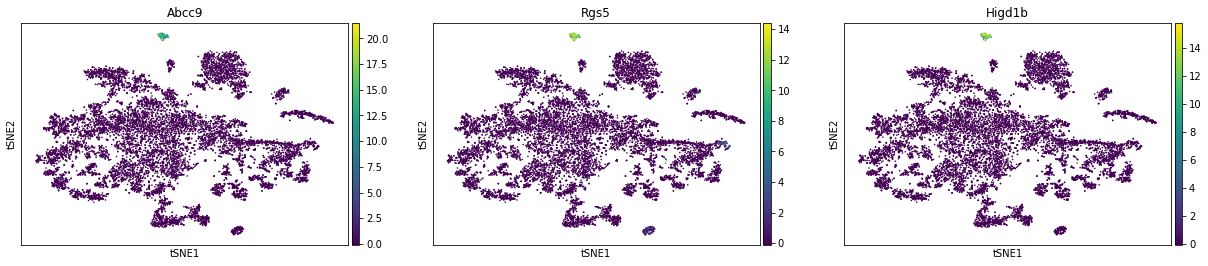

In [19]:
sc.pl.tsne(adata, color = ["Abcc9",
"Rgs5",
"Higd1b"]) #cluster 23 pericytes

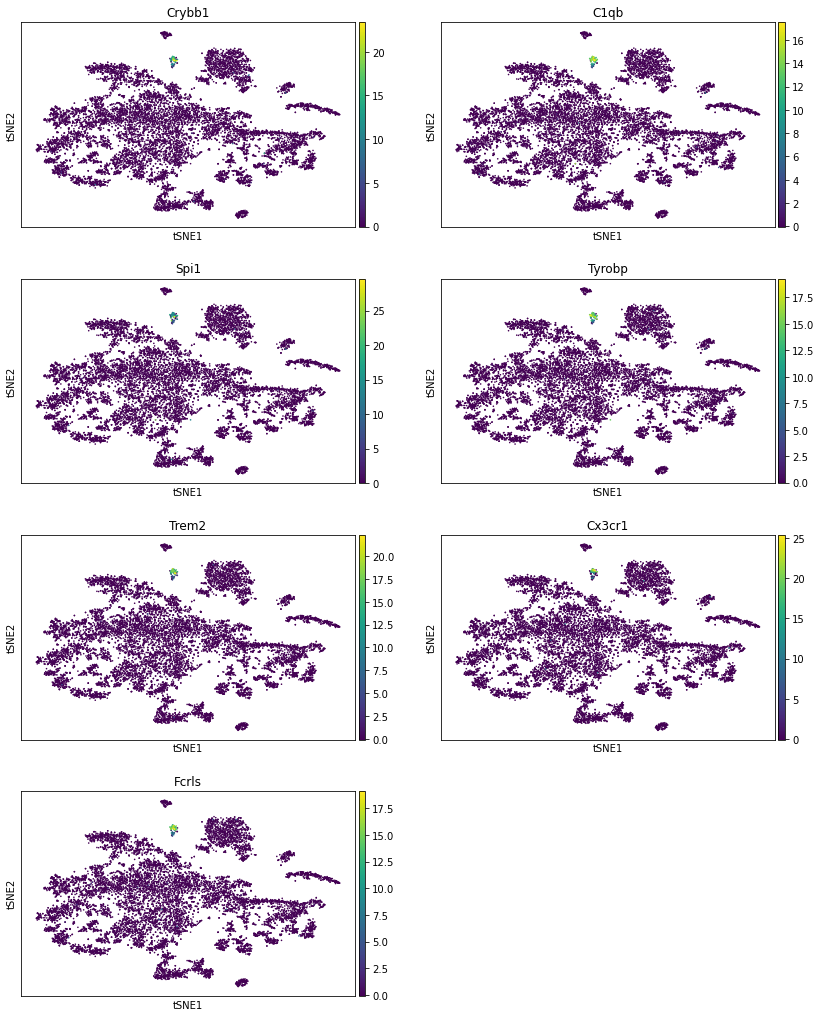

In [20]:
#microglia = 22 vs. rest #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5332364/ (table 2)
sc.pl.tsne(adata, color=['Crybb1', 'C1qb', 'Spi1','Tyrobp', 'Trem2', 'Cx3cr1', 'Fcrls'], ncols=2) 

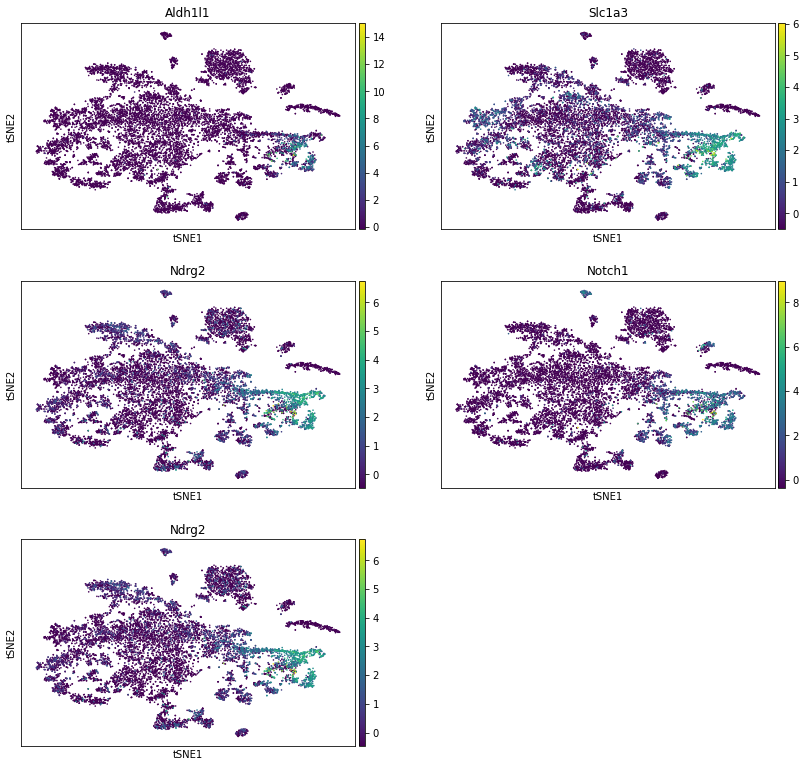

In [22]:
#Astrocyte Markers = 15 & 6 vs rest #https://resources.rndsystems.com/images/site/rnd-systems-neural-markers-br2.pdf
sc.pl.tsne(adata, color=[ 'Aldh1l1', 'Slc1a3','Ndrg2', 'Notch1', 'Ndrg2'], ncols=2) 

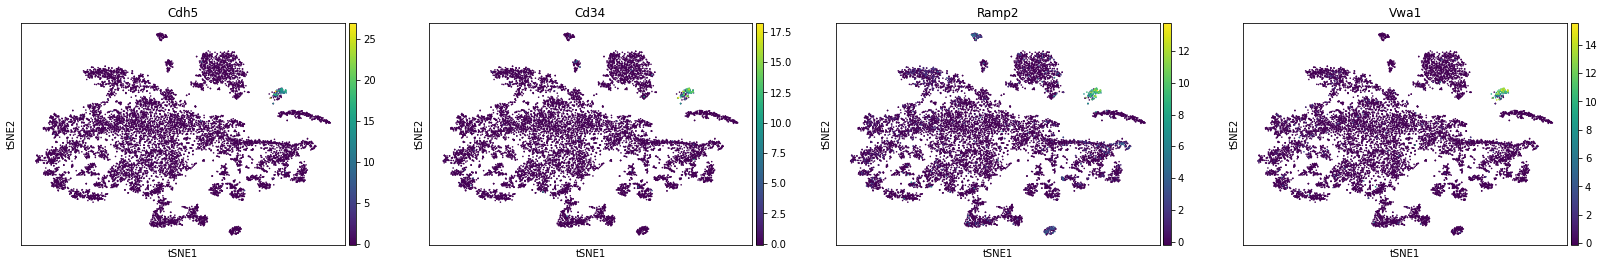

In [23]:
# vascular endethelial cells (BBB?) = 18 vs rest 
sc.pl.tsne(adata, color=['Cdh5', 'Cd34', 'Ramp2', 'Vwa1'])


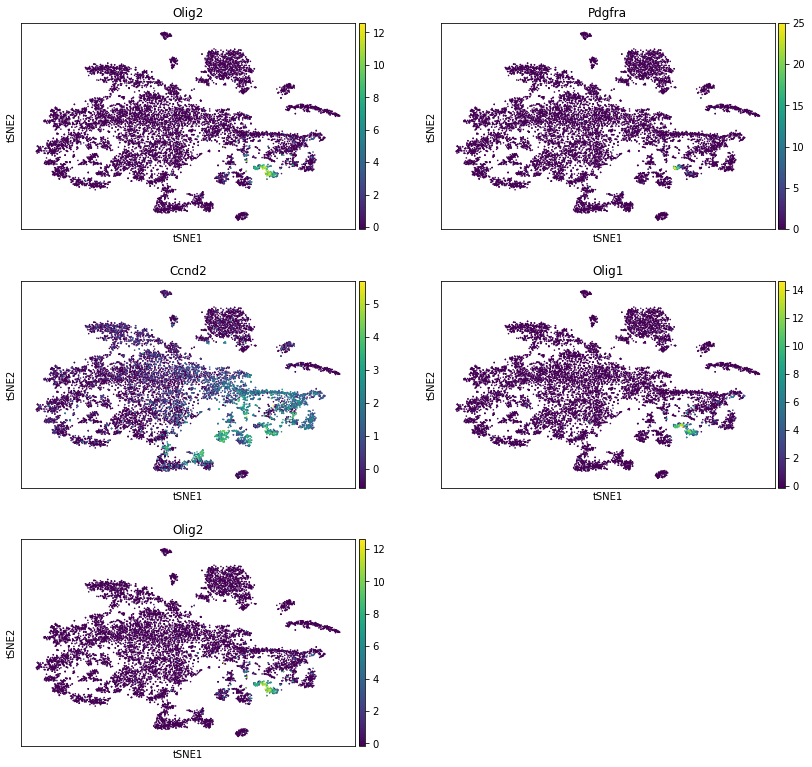

In [24]:
#Oligodendrocyte Markers = 17 vs rest #https://resources.rndsystems.com/images/site/rnd-systems-neural-markers-br2.pdf
sc.pl.tsne(adata, color=['Olig2', 'Pdgfra', 'Ccnd2', 'Olig1', 'Olig2'], ncols=2) 

In [27]:
# genes into a list
genes = []
for name in adata.var_names: 
    genes.append(name)

In [28]:
#sort for searching
genes.sort()

In [91]:
# top x reslults for cluster (this is how we searched)
count = 0
for cluster in adata.uns['rank_genes_groups']['names']:
    print(cluster[10]) #input l
    count+=1
    if count == 20: #x results wanted
        break

Hmgb2
Hmgn2
Cenpa
Cdk6
H2afz
Smc4
Birc5
H2afv
Mdk
Pclaf
Rrm2
Foxp2
Eomes
Pcp4
H2afx
Smc2
Cenpf
Tpx2
Gadd45g
Ube2c


In [116]:
#name stuff
for i in range(len(adata.obs['leiden'])):
    if adata.obs['leiden'][i] == '21':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'pericyte', inplace = True)
    elif adata.obs['leiden'][i] == '23':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'pericyte2', inplace = True)
    elif adata.obs['leiden'][i] == '6':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'astrocytes (radial glia)', inplace = True)
    elif adata.obs['leiden'][i] == '15':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'astrocytes2', inplace = True)
    elif adata.obs['leiden'][i] == '17':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'oligodendrocytes', inplace = True)
    elif adata.obs['leiden'][i] == '18':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'Blood Brain B - Vascular endothelial cells', inplace = True)
    elif adata.obs['leiden'][i] == '1':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'gabaergic', inplace = True)
    elif adata.obs['leiden'][i] == '22':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'microglia', inplace = True)
    elif adata.obs['leiden'][i] == '12':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'gabaergic2.0', inplace = True)
    elif adata.obs['leiden'][i] == '16':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'gabaergic3.0', inplace = True)
    elif adata.obs['leiden'][i] == '11':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'pyramidal neurons, Camkv', inplace = True)

In [117]:
#assign colors
adata.uns['leiden_colors'][21] = '#B5BD61'
adata.uns['leiden_colors'][23] = '#000000'
adata.uns['leiden_colors'][7] = '#FF4A46'
adata.uns['leiden_colors'][15] = "#0AA6D8"
adata.uns['leiden_colors'][0] = "#808080"
adata.uns['leiden_colors'][2] = "#808080"
adata.uns['leiden_colors'][3] = "#808080"
adata.uns['leiden_colors'][4] = "#808080"
adata.uns['leiden_colors'][5] = "#808080"
adata.uns['leiden_colors'][8] = "#808080"
adata.uns['leiden_colors'][7] = "#808080"
adata.uns['leiden_colors'][9] = "#808080"
adata.uns['leiden_colors'][10] = "#808080"
adata.uns['leiden_colors'][12] = "#9400D3"
adata.uns['leiden_colors'][13] = "#808080"
adata.uns['leiden_colors'][14] = "#808080"
adata.uns['leiden_colors'][16] = "#FF6EC7"
adata.uns['leiden_colors'][19] = "#808080"
adata.uns['leiden_colors'][20] = "#808080"

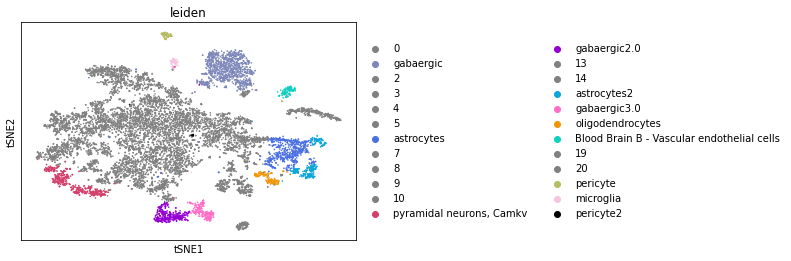

In [118]:
sc.pl.tsne(adata, color='leiden')